<font size=10>**Pràctica 2**</font>




Lluís Picornell Company<br/>
43477189J<br/>
Xavier Vives Marcus<br/>
43462573W<br/>

# Totes les llibreries que emprarem:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import numpy as np

# Neteja de dades

In [2]:
# Llegim dades
data = pd.read_csv('dades.csv')
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Llevam columnes 'PassengerId' , 'Name' i 'Ticket' Ja que no aporten cap informació

In [3]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
print(data.columns.values)
data

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Cabin' 'Embarked']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


Podem veure que la columna 'Sex' té valors que no seran compatibles amb el que volem fer. Per tant els substiuim per valors 0 o 1

In [4]:
data['Sex'].replace('female', 0,inplace=True)
data['Sex'].replace('male', 1,inplace=True)
train_df

NameError: name 'train_df' is not defined

Comprovem quants de NaNs hi ha al nostre df

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None


Podem veure que la columna 'Cabin' només hi ha 204 registres (d'un total de 891) que no son NaNs per tant eliminam la columna 'Cabin'

In [6]:
data.drop(['Cabin'],axis=1,inplace=True)

Substituim els valors NaN de la columna 'Age' per la mitjana de Age perquè tampoc n'hi ha tants que siguin NaN

In [7]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

Canviam la columna Embarked per Embarked_C , Embarked_S i Embarked_Q i així poder treballar amb aquesta columna

In [8]:
clb = data.pop("Embarked")
ohe_clb = pd.get_dummies(clb, prefix='Embarked')
data = pd.concat([data.reset_index(drop=True), ohe_clb.reset_index(drop=True)], axis=1, sort=False)

Podem veure que ja no tenim valors no numèrics

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB
None


Anem a veure com de relacionades estan les dades

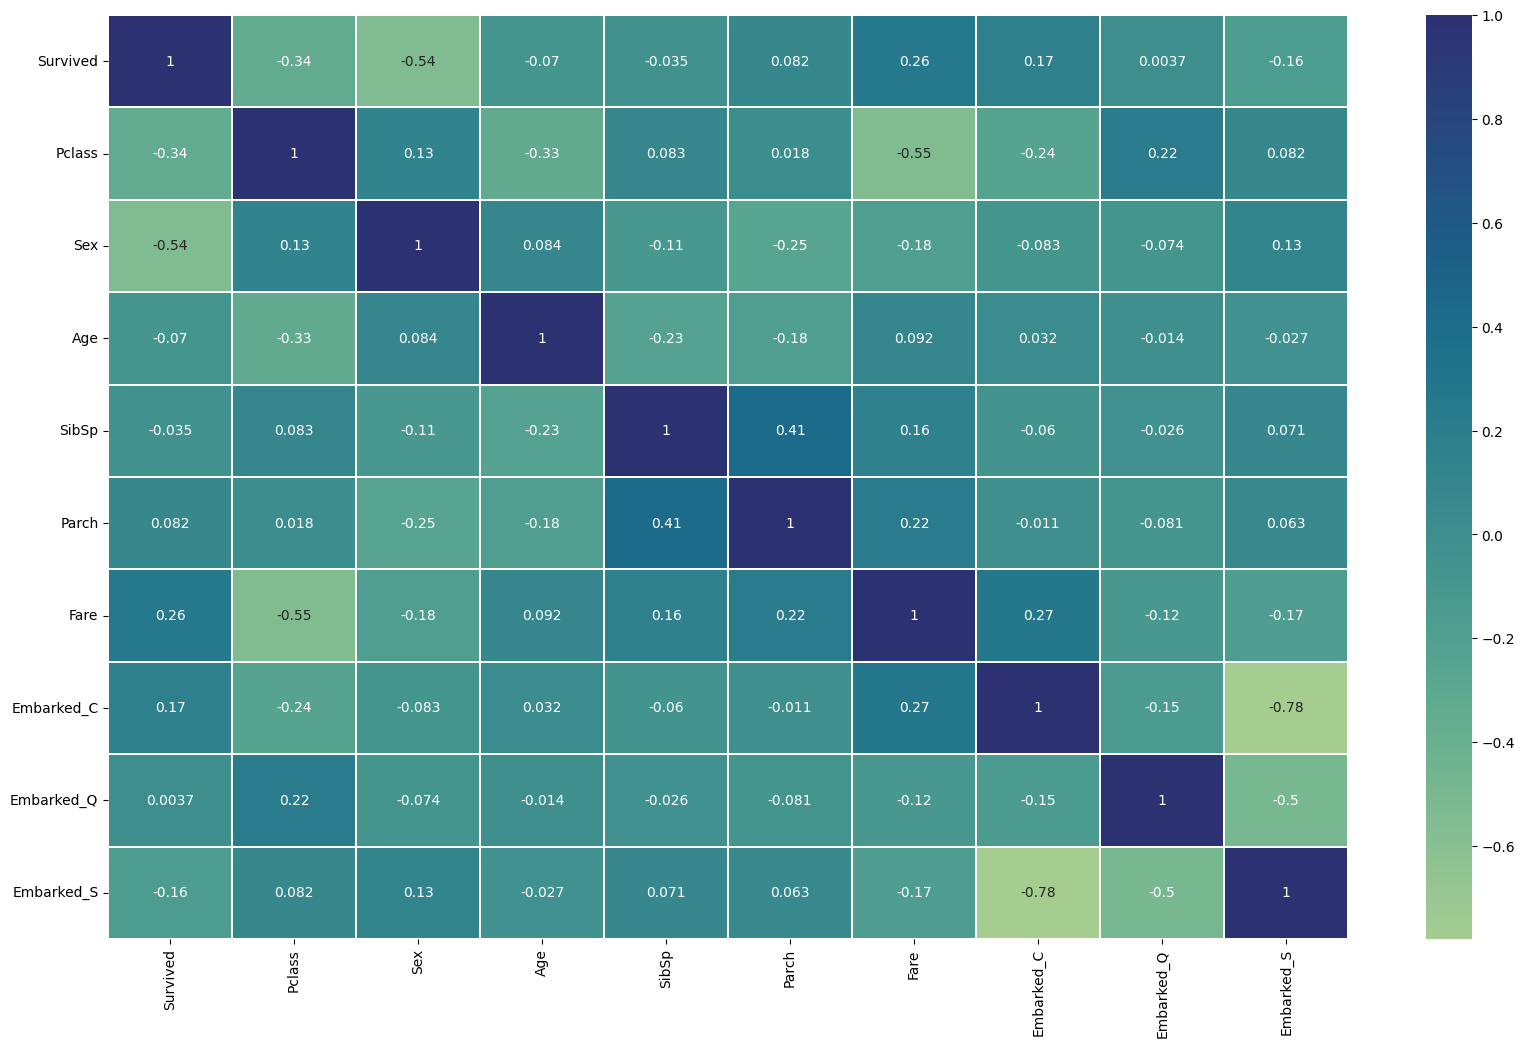

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='crest',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Podem veure que 'SibSp' , 'Parch' i 'Age' no estan gens relacionades amb 'Survive' (que és la que ens interessa).
per tant, les llevam.

In [11]:
data.drop(['SibSp','Parch','Age'],axis=1,inplace=True)
data

,Survived,Pclass,Sex,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,0,0,1
1,1,1,0,71.2833,1,0,0
2,1,3,0,7.9250,0,0,1
3,1,1,0,53.1000,0,0,1
4,0,3,1,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,0,2,1,13.0000,0,0,1
887,1,1,0,30.0000,0,0,1
888,0,3,0,23.4500,0,0,1
889,1,1,1,30.0000,1,0,0


Dividim entre dades per entrenar el model i dades per comprovar si funciona

In [12]:
data_copia=data
all_features = data.drop("Survived",axis=1)
Targeted_feature = data["Survived"]
x_train,x_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.33,random_state=69420)

# Regressió Logística

Cream el model i l'entrenam

In [13]:
modellr = LogisticRegression()
modellr.fit(x_train,y_train)

LogisticRegression()

El testejam i obtenim els resultats

In [14]:
prediction_lr = modellr.predict(x_test)
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       197
           1       0.63      0.76      0.69        98

    accuracy                           0.77       295
   macro avg       0.75      0.77      0.75       295
weighted avg       0.79      0.77      0.77       295



## Feature Importance

In [15]:
importances = modellr.coef_

importances=str(importances.tolist())
dissallowed_chars="[] "
for c in dissallowed_chars:
    importances=importances.replace(c,"")

importances=importances.split(",")

features=x_train.columns
for i in range(len(features)):
    print("Característica: ",x_train.columns[i],  "\t\tImportància: ",importances[i])




Característica:  Pclass 		Importància:  -0.9516361478951626
Característica:  Sex 		Importància:  -2.4569951174202864
Característica:  Fare 		Importància:  0.0008754164862306981
Característica:  Embarked_C 		Importància:  0.24806581752708945
Característica:  Embarked_Q 		Importància:  0.08770696994822011
Característica:  Embarked_S 		Importància:  -0.4037860956621642


# Perceptró

In [22]:
'''
Perceptró
'''
modelp = Perceptron()
modelp.fit(x_train,y_train)
prediction_p = modelp.predict(x_test)
print(classification_report(y_test, prediction_p,zero_division=1))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       197
           1       1.00      0.00      0.00        98

    accuracy                           0.67       295
   macro avg       0.83      0.50      0.40       295
weighted avg       0.78      0.67      0.53       295



In [27]:
importances = modelp.coef_

importances=str(importances.tolist())
dissallowed_chars="[] "
for c in dissallowed_chars:
    importances=importances.replace(c,"")

importances=importances.split(",")

features=x_train.columns
for i in range(len(features)):
    print("Característica: ",x_train.columns[i],  "\t\tImportància: ",importances[i])

Característica:  Pclass 		Importància:  -39.0
Característica:  Sex 		Importància:  -457.0
Característica:  Fare 		Importància:  -46.60529999999968
Característica:  Embarked_C 		Importància:  77.0
Característica:  Embarked_Q 		Importància:  40.0
Característica:  Embarked_S 		Importància:  -107.0


# Arbres de decisió

In [42]:
'''
Arbres de decisió
'''
modelad = RandomForestClassifier(random_state=69420)
modelad.fit(x_train,y_train)
prediction_ad = modelad.predict(x_test)
print(classification_report(y_test, prediction_ad))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       197
           1       0.67      0.73      0.70        98

    accuracy                           0.79       295
   macro avg       0.77      0.78      0.77       295
weighted avg       0.80      0.79      0.80       295



In [43]:

importances =modelad.feature_importances_

importances=str(importances.tolist())
dissallowed_chars="[] "
for c in dissallowed_chars:
    importances=importances.replace(c,"")

importances=importances.split(",")

features=x_train.columns
for i in range(len(features)):
    print("Característica: ",x_train.columns[i],  "\t\tImportància: ",importances[i])

Característica:  Pclass 		Importància:  0.12858767549162733
Característica:  Sex 		Importància:  0.3281938662501471
Característica:  Fare 		Importància:  0.5046216871059884
Característica:  Embarked_C 		Importància:  0.014952890849625207
Característica:  Embarked_Q 		Importància:  0.007819237417816729
Característica:  Embarked_S 		Importància:  0.015824642884795254


In [44]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64